In [2]:
import pandas as pd

import warnings
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**December 2018**

När nya partisympatiundersökningen (PSU) kom i december 2018 funderade jag på ifall vi kunde hitt anågon egen vinkel. Det slog mig att det vore intressant att se var unga väljare tar vägen någonstans. Data hämtades från [SCB:s statistikdatabas](http://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__ME__ME0201__ME0201B/Partisympati05/?rxid=8449fb5b-ee75-4b33-ba3b-d17c2f52de3c).

Notera att utbrutna grupper dras med en felmarginal som gör det svårt att dra på ett enskilt resultat i PSU. Därför valde vi att fokusera på långsiktiga trender. Resultatet var att det mycket tydligt var så att MP tydligt tappat en stor del av sitt stöd, och att nästan omvänd utveckling fanns i sympatierna för C. Resultatet blev [denna artikel](https://dagenssamhalle.se/nyhet/centerpartiet-vaxer-bland-unga-valjare-25319).

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/scb_data.csv', encoding = "ISO-8859-1").rename(columns={'2 ggr/år':'mätning','18-24 år':'18_24'})

In [5]:
df = df.loc[df['parti'].isin(['MP','C'])]

In [6]:
df = df.loc[df.tabellinnehåll=='Svarsfördelning, procent'].sort_values('mätning')

In [7]:
df['18_24'] = pd.to_numeric(df['18_24'])

In [8]:
os.makedirs('res')

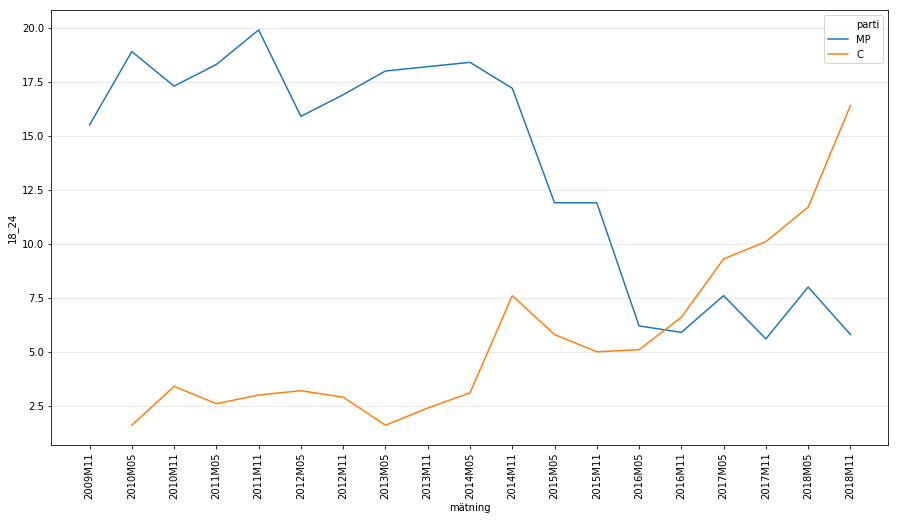

In [9]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df.iloc[15:],x='mätning',y='18_24',hue='parti')

plt.xticks(rotation=90)
plt.grid(True,axis='y',alpha=0.3)
plt.savefig('res/partisympatier_18_24år.png')


In [10]:
df = pd.read_csv('data/scb_data.csv', encoding = "ISO-8859-1").iloc[15:].rename(columns={'2 ggr/år':'mätning','18-24 år':'andel'})

In [11]:
df = df.loc[df.tabellinnehåll=='Svarsfördelning, procent'].sort_values('mätning')

In [12]:
df.andel=df.andel.str.replace('\.\.',"")

In [13]:
df['andel'] = pd.to_numeric(df['andel'])

In [14]:
df[['parti','mätning','andel']].pivot(index='parti',columns='mätning',values='andel').T.reset_index().to_excel('res/unga_sympatier.xlsx',index=False)

In [15]:
unga = pd.read_csv('data/alla_valda_2018.csv')

In [16]:
unga.head()

,andel_kryss_valkrets,grund,id,kommun,mandat,namn,nummer,parti,partiprocent,partiröster,stol,summa_kryss_valkrets,summa_röster_valkrets,valkrets,ålder
0,"39,20",P,243427.0,Munkedal,7,Ann-Sofie Alm,1,M,19.33,1305,vald,2647,6752,Munkedal,46.0
1,"39,20",J,254818.0,Munkedal,7,Jan Hognert,2,M,19.33,1305,vald,2647,6752,Munkedal,67.0
2,"39,20",J,254819.0,Munkedal,7,Ausra Karlsson,3,M,19.33,1305,vald,2647,6752,Munkedal,48.0
3,"39,20",J,243439.0,Munkedal,7,Robin Karlsson Dahlgren,4,M,19.33,1305,vald,2647,6752,Munkedal,20.0
4,"39,20",J,254822.0,Munkedal,7,Martin Svenberg Rödin,5,M,19.33,1305,vald,2647,6752,Munkedal,41.0


In [17]:
unga = unga.loc[(unga['parti'].isin(['C']))\
                &(unga['stol']=='vald')&(unga['ålder']<25)][['namn','id','parti',
                                                             'kommun','grund','ålder']]\
    .reset_index(drop=True)#.to_excel('resultat/unga_valda.xlsx',index=False)

In [18]:
kryss = pd.read_csv('data/kandidater_personval_2018.csv')

In [19]:
unga.merge(kryss.loc[kryss['parti']=='C',
                     ['id','kommun','personkryss','kryssandel']],
           on=['id','kommun'],
           how='left')[['namn',
                        'kommun',
                        'ålder',
                        'grund',
                        'personkryss',
                        'kryssandel']]\
                .sort_values('kryssandel',ascending=False).to_excel('res/unga_valda.xlsx',index=False)